In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

In [29]:
def one_hot(data):
    df_embarked = pd.get_dummies(data.Embarked)
    df_Pclass = pd.get_dummies(data.Pclass)
    df_sex = pd.get_dummies(data.Sex)
    return pd.concat([data, df_embarked, df_Pclass, df_sex])

df = one_hot(df)

Pclass
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

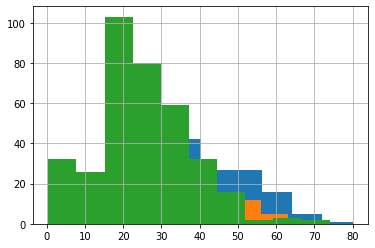

In [47]:
df.groupby('Pclass')['Age'].hist(bins=10)

In [13]:
df.groupby('Pclass').apply(lambda x : x.isna().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,,
1,0,0,0,0,0,30,0,0,0,0,40,2
2,0,0,0,0,0,11,0,0,0,0,168,0
3,0,0,0,0,0,136,0,0,0,0,479,0


In [25]:
import numpy as np
df.pivot_table(index = 'Pclass', columns='Sex', values=['PassengerId', 'Fare', 'Age'], aggfunc={'PassengerId': len, 'Age': [np.mean, np.max], 'Fare': np.mean})

Age                                    Fare            PassengerId  \
         amax             mean                   mean                    len   
Sex    female  male     female       male      female       male      female   
Pclass                                                                         
1        63.0  80.0  34.611765  41.281386  106.125798  67.226127          94   
2        57.0  70.0  28.722973  30.740707   21.970121  19.741782          76   
3        63.0  74.0  21.750000  26.507589   16.118810  12.661633         144   

             
             
Sex    male  
Pclass       
1       122  
2       108  
3       347